In [1]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# loading data from CSV file
r_cols = ['userId', 'movieId', 'rating', 'timestamp']
m_cols=['movieId', 'title', 'genres']
movies = pd.read_csv('F:\MS-Research\Group RS\Datasets\ml-1m/movies.dat', sep='::', names=m_cols)
ratings = pd.read_csv('F:\MS-Research\Group RS\Datasets\ml-1m/ratings.dat', sep='::',  names=r_cols)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
df_combined = pd.merge(ratings, movies, on = 'movieId')

In [6]:
df_combined

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [7]:
Mem_mat=pd.read_csv('mem_mat.csv')

In [8]:
Mem_mat

,Action,Adventure
0,0.526894,0.473106
1,0.520339,0.479661
2,0.502789,0.497211
3,0.519306,0.480694
4,0.462777,0.537223
...,...,...
6035,0.403684,0.596316
6036,0.398373,0.601627
6037,0.535877,0.464123
6038,0.429654,0.570346


In [9]:
topk=200
#k=15
t=5     #Represents top-k movies to users
top=10  #Represents Number of user's in a group
ng1=[]
ng2=[]
ng3=[]
ng4=[]
#Sort the membership matrix by group 
srt=Mem_mat.sort_values(by=['Action'], ascending=False)
Top_K=srt.iloc[:topk, :] #select the top k users in a particular group
g1=list(Top_K.T) # getting the indexes of top k users

#selecting top k g2 users
srt=Mem_mat.sort_values(by=['Adventure'], ascending=False)
Top_K=srt.iloc[:topk, :] #select the top k users in a particular group
g2=list(Top_K.T) # getting the indexes of top k users


#selecting top k g3 users
#srt=Mem_mat.sort_values(by=['Animation'], ascending=False)
#Top_K=srt.iloc[:topk, :] #select the top k users in a particular group
#g3=list(Top_K.T) # getting the indexes of top k users

#selecting top k g4 users
#srt=Mem_mat.sort_values(by=['Children's'], ascending=False)
#Top_K=srt.iloc[:topk, :] #select the top k users in a particular group
#g4=list(Top_K.T) # getting the indexes of top k users

#for i in range(k):
#    ng1.append(g1[i])
#    ng2.append(g2[i])
#    ng3.append(g3[i])
#    ng4.append(g4[i])

In [10]:
def groupRat(ratings,g):
    rat_mat=ratings.loc[ratings['userId']==g[0]]
    for i in range(len(g)-1):
        rat_mat=pd.concat([rat_mat, ratings.loc[ratings['userId']==g[i+1]]], ignore_index=True)
    #df_combined = pd.merge(rat_mat, movies, on = 'movieId')
    #util_mat = df_combined.pivot_table(index = 'userId', columns = 'movieId', values = 'rating')
    #df=util_mat.fillna(0)
    return rat_mat

In [11]:
g1_rat=groupRat(ratings, g1) #gives actual ratings and indexes of top k users in particular group
g2_rat=groupRat(ratings, g2)
#g3_rat=groupRat(ratings, g3)
#g4_rat=groupRat(ratings, g4)

#ng1_rat=groupRat(ratings, ng1) #gives actual ratings and indexes of top n=(5,10,15) users in particular group
#ng2_rat=groupRat(ratings, ng2)
#ng3_rat=groupRat(ratings, ng3)
#ng4_rat=groupRat(ratings, ng4)

In [12]:
df=g1_rat.copy()
c=0 #for cluster 1
#top=10

user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])


G_df=df.pivot_table(index = 'user', columns = 'movie', values = 'rating')
G_df=G_df.fillna(0)
G_df=G_df.T
Sim_mat=G_df.corr(method ='pearson') 
def pd_fill_diagonal(df_matrix, value=0): 
    mat = df_matrix.values
    n = mat.shape[0]
    mat[range(n), range(n)] = value
    return pd.DataFrame(mat)
Pearson_sim=pd_fill_diagonal(Sim_mat, 0)
Pearson_sim

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.064449,0.280084,0.144893,0.167743,0.286154,0.301943,0.098890,0.193319,0.146066,...,0.178573,0.225662,-0.017182,0.239360,0.103843,0.307127,0.055254,0.181736,0.189424,0.039553
1,0.064449,0.000000,0.036366,0.064933,0.093653,0.063509,0.031462,0.023735,0.014967,0.108267,...,-0.008455,0.138315,0.017968,-0.015427,0.127842,0.032795,0.013475,0.089616,0.008009,0.218015
2,0.280084,0.036366,0.000000,0.126345,0.026584,0.214106,0.195500,0.094548,0.105062,0.173706,...,0.064128,0.119942,-0.003211,0.169070,0.096964,0.195521,0.056785,0.122366,0.081385,0.044195
3,0.144893,0.064933,0.126345,0.000000,0.232012,0.376787,0.190038,0.066255,0.051459,0.057812,...,0.094101,0.345188,0.009116,-0.011310,0.103185,0.131658,0.013983,0.085681,0.137941,-0.023301
4,0.167743,0.093653,0.026584,0.232012,0.000000,0.170698,0.185772,0.069883,0.020070,0.003947,...,0.157847,0.265028,0.017147,0.039366,0.214761,0.102418,-0.014339,0.206874,0.076262,0.025601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.307127,0.032795,0.195521,0.131658,0.102418,0.327135,0.272654,0.160717,0.270873,0.100857,...,0.257263,0.065027,-0.036085,0.165998,0.113595,0.000000,0.126025,0.156323,0.146353,0.009102
196,0.055254,0.013475,0.056785,0.013983,-0.014339,0.082616,0.103106,0.023870,0.126826,0.070723,...,0.054009,-0.019338,-0.032068,0.025598,0.049207,0.126025,0.000000,0.036227,0.193057,-0.021419
197,0.181736,0.089616,0.122366,0.085681,0.206874,0.118398,0.148320,0.046900,0.061430,0.089764,...,0.095259,0.116550,-0.011805,0.113017,0.108745,0.156323,0.036227,0.000000,0.090327,0.053531
198,0.189424,0.008009,0.081385,0.137941,0.076262,0.194340,0.177580,0.062922,0.117528,0.140097,...,0.134503,0.163240,-0.017370,0.044054,0.038493,0.146353,0.193057,0.090327,0.000000,-0.025668


In [29]:
movie_encoded2movie

{0: 1250,
 1: 1252,
 2: 2997,
 3: 1259,
 4: 589,
 5: 3006,
 6: 3007,
 7: 2064,
 8: 1262,
 9: 1263,
 10: 1266,
 11: 593,
 12: 3016,
 13: 3019,
 14: 1270,
 15: 1272,
 16: 1276,
 17: 750,
 18: 1291,
 19: 1292,
 20: 1294,
 21: 1298,
 22: 1299,
 23: 924,
 24: 785,
 25: 3201,
 26: 2268,
 27: 1466,
 28: 1610,
 29: 1617,
 30: 2278,
 31: 2427,
 32: 2289,
 33: 3257,
 34: 2470,
 35: 1673,
 36: 1674,
 37: 2628,
 38: 223,
 39: 3298,
 40: 3441,
 41: 3448,
 42: 3450,
 43: 2657,
 44: 246,
 45: 247,
 46: 3468,
 47: 3469,
 48: 3476,
 49: 260,
 50: 3635,
 51: 2699,
 52: 296,
 53: 3653,
 54: 2858,
 55: 1127,
 56: 457,
 57: 2871,
 58: 1136,
 59: 608,
 60: 3683,
 61: 3836,
 62: 2890,
 63: 480,
 64: 1307,
 65: 1179,
 66: 647,
 67: 1327,
 68: 1189,
 69: 1193,
 70: 1196,
 71: 1198,
 72: 2174,
 73: 2324,
 74: 1387,
 75: 858,
 76: 2194,
 77: 1394,
 78: 1396,
 79: 1704,
 80: 3173,
 81: 3174,
 82: 1580,
 83: 110,
 84: 111,
 85: 117,
 86: 2395,
 87: 3342,
 88: 3359,
 89: 3362,
 90: 2706,
 91: 3363,
 92: 2716,
 93: 

In [13]:
#c=0 #for cluster 1
#top=10
w=Pearson_sim.loc[4] #Randomly select a user and create a group for user u
w=w.sort_values(ascending=False)
w=w[:20]
#userencoded2user

In [14]:
w_ind=w.index.values.tolist()
for i in range(len(w_ind)):
    w.iloc[i]=w.iloc[i]*(Mem_mat.iloc[userencoded2user[w_ind[i]]-1,c])
w=w.sort_values(ascending=False)
w=w[:top]
w

153    0.374228
29     0.249735
174    0.212659
19     0.202310
175    0.192429
46     0.189102
112    0.188655
82     0.187746
161    0.165045
118    0.162680
Name: 4, dtype: float64

In [15]:
w=w.sort_values(ascending=False)
#w

In [16]:
ind=w.index.values.tolist() 

In [17]:
result=df.loc[df['user'] == ind[0]]
for i in range(len(ind)-1):
    result = pd.concat([result,df.loc[df['user']==ind[i+1]]])
g_rat=result.copy()
g_rat["rat"]=y = g_rat["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
g_comb = g_rat.pivot_table(index = 'user', columns = 'movie', values = 'rating')
g_comb=g_comb.fillna(0)
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)


Number of users: 200, Number of Movies: 2888, Min rating: 1.0, Max rating: 5.0


In [18]:
g_comb

movie,2,3,4,5,7,8,11,14,16,17,...,2602,2651,2742,2743,2755,2756,2757,2758,2759,2760
user,,,,,,,,,,,,,,,,,,,,,
19,0.0,4.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,4.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,0.0,0.0,5.0,4.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
161,4.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,...,5.0,4.0,0.0,0.0,5.0,4.0,5.0,5.0,1.0,5.0
174,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.85 * df.shape[0])
val_indices=int(0.9*train_indices)
x_train, x_val, x_test, y_train, y_val, y_test = (
    x[:val_indices],
    x[val_indices:],
    x[train_indices:], 
    y[:val_indices],
    y[val_indices: ],
    y[train_indices:],
)

In [20]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(x_val, y_val),
)

Train on 26545 samples, validate on 8156 samples
Epoch 1/20


F:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
F:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


26545/26545 [==============================] - 3s 113us/sample - loss: 0.6640 - val_loss: 0.6396
Epoch 2/20
26545/26545 [==============================] - 1s 35us/sample - loss: 0.6478 - val_loss: 0.6733
Epoch 3/20
26545/26545 [==============================] - 1s 35us/sample - loss: 0.6415 - val_loss: 0.6231
Epoch 4/20
26545/26545 [==============================] - 1s 35us/sample - loss: 0.6267 - val_loss: 0.6544
Epoch 5/20
26545/26545 [==============================] - 1s 35us/sample - loss: 0.6200 - val_loss: 0.6150
Epoch 6/20
26545/26545 [==============================] - 1s 36us/sample - loss: 0.6129 - val_loss: 0.6390
Epoch 7/20
26545/26545 [==============================] - 1s 36us/sample - loss: 0.6081 - val_loss: 0.6126
Epoch 8/20
26545/26545 [==============================] - 1s 38us/sample - loss: 0.6037 - val_loss: 0.6239
Epoch 9/20
26545/26545 [==============================] - 1s 36us/sample - loss: 0.6005 - val_loss: 0.6136
Epoch 10/20
26545/26545 [======================

In [21]:
def plot(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()

Results for Group 1
Minimum RMSE at epoch 20 = 0.7755
Minimum MAE at epoch 20 = 0.6013
5206/5206 [==============================] - 0s 22us/sample - loss: 0.6033
test loss, test acc: 0.603312704753656


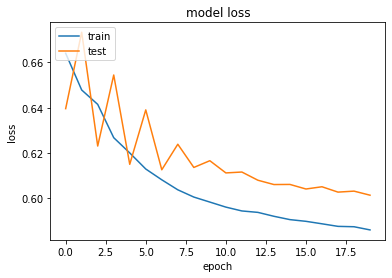

In [22]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
print('Results for Group 1')
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))
print ('Minimum MAE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(abs(min_val_loss)))
results = model.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

plot(history)

In [24]:
pred_grat=g_comb.copy()
for i in range(len(g_comb)):
    for j in range(len(g_comb.T)):
        if((pred_grat.iloc[i,j]>=0.0)):
            tem=[[i,j]]
            temp=model.predict(tem)
            #pred_grat.iloc[i,j]=model.predict(tem)
            temp=((temp*(5-1.0))+1.0)
            pred_grat.iloc[i,j]=temp

In [25]:
pred_grat

movie,2,3,4,5,7,8,11,14,16,17,...,2602,2651,2742,2743,2755,2756,2757,2758,2759,2760
user,,,,,,,,,,,,,,,,,,,,,
19,3.788315,4.125766,3.737607,3.461770,3.437890,3.456470,3.017979,3.125435,3.679276,3.657499,...,2.431564,3.061165,2.634377,3.093395,3.065187,3.954626,3.453257,3.298024,2.679907,2.499678
29,4.069334,4.337654,4.011738,3.772318,3.744654,3.765934,3.332787,3.450892,3.952760,3.920565,...,2.700528,3.463287,3.012732,3.404162,3.334664,4.205084,3.764239,3.602508,3.019082,2.852663
46,4.369699,4.564575,4.329731,4.149493,4.095705,4.126828,3.790739,3.843754,4.285323,4.245421,...,3.200714,3.835093,3.417973,3.838738,3.811524,4.459895,4.125855,4.016304,3.483642,3.331846
82,3.958764,4.256952,3.893058,3.642491,3.580865,3.590458,3.188809,3.284398,3.804736,3.828722,...,2.564406,3.260704,2.839028,3.239796,3.229624,4.111018,3.619552,3.459979,2.876662,2.713576
112,3.283975,3.649111,3.177322,2.889759,2.863456,2.873712,2.443000,2.529516,3.091097,3.102114,...,1.950799,2.539842,2.098708,2.512815,2.484572,3.493708,2.871995,2.706318,2.141617,2.008045
118,3.357140,3.758807,3.278862,2.992243,2.903816,2.977917,2.506980,2.589603,3.177640,3.197430,...,1.994856,2.595466,2.173535,2.570002,2.567062,3.574135,2.994092,2.807786,2.216301,2.073102
153,3.817148,4.115851,3.719013,3.450837,3.410657,3.416956,2.995603,3.078666,3.670170,3.622491,...,2.414825,3.105462,2.634423,3.062878,3.026474,3.964029,3.477282,3.284266,2.657473,2.497251
161,4.127833,4.394058,4.070962,3.850840,3.813929,3.823494,3.439157,3.493143,4.020288,3.993409,...,2.812669,3.523046,3.049792,3.486174,3.462248,4.263689,3.832769,3.698897,3.073647,2.943050
174,4.272247,4.487304,4.215824,4.008976,3.970182,3.989684,3.632320,3.687776,4.152968,4.147818,...,3.025443,3.691314,3.255905,3.677114,3.669714,4.376321,4.004511,3.878358,3.310969,3.145642


In [27]:
pred_grat.to_csv('pred_grat.csv',index=False)

In [26]:
g_comb

movie,2,3,4,5,7,8,11,14,16,17,...,2602,2651,2742,2743,2755,2756,2757,2758,2759,2760
user,,,,,,,,,,,,,,,,,,,,,
19,0.0,4.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,4.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,0.0,0.0,5.0,4.0,0.0,0.0,0.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
161,4.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,...,5.0,4.0,0.0,0.0,5.0,4.0,5.0,5.0,1.0,5.0
174,0.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
g_comb.to_csv('orig_grat.csv',index=False)

In [26]:
avg_grat=pred_grat.mean()
avg_grat=avg_grat.sort_values(ascending=False)

In [27]:
#t=5
top7=avg_grat[:t]
re=top7.index.tolist()
print("Top-K recommendations for group G")
top7

Top-K recommendations for group G


movie
49     4.7
152    4.7
70     4.6
627    4.5
4      4.5
dtype: float32

In [28]:
r=0
p=0
for i in range(len(g_comb)):
    hit=0
    rel=0
    for j in range(len(re)):
        res=g_comb[re[j]]
        if(res.iloc[i]>0):
            hit+=1
    p+=(hit/len(re))
    for j in range(len(g_comb.T)):
        if(g_comb.iloc[i,j]>0):
            rel+=1
    r+=(hit/rel)
p=(p/len(g_comb))
r=(r/len(g_comb))
f1_score=((2*p*r)/(p+r))

print("Precision@5:", p)
print("Recall@5:", r)
print("F1-Score@5:", f1_score)
print("Top-K recommendations for group G")
top7

Precision@5: 1.0
Recall@5: 0.06533721732633155
F1-Score@5: 0.12266016105268122
Top-K recommendations for group G


movie
49     4.7
152    4.7
70     4.6
627    4.5
4      4.5
dtype: float32

In [29]:
sat_g=0
for i in range(len(pred_grat)):
    sat_u=0
    rat=0
    
    for j in range(len(re)):
        res=pred_grat[re[j]]
        rat+=res.iloc[i]
    sat_u=(rat/(t*5))
    sat_g+=sat_u
sat_g=sat_g/len(pred_grat)

In [30]:
sat_g

0.9199999999999999

In [31]:
user2user_encoded

{1775: 0,
 228: 1,
 3848: 2,
 780: 3,
 2126: 4,
 1780: 5,
 4964: 6,
 3744: 7,
 466: 8,
 1376: 9,
 1114: 10,
 2791: 11,
 3040: 12,
 3921: 13,
 2201: 14,
 3689: 15,
 2199: 16,
 719: 17,
 3296: 18,
 2599: 19,
 4975: 20,
 3663: 21,
 1221: 22,
 4359: 23,
 1991: 24,
 2314: 25,
 1734: 26,
 4698: 27,
 4283: 28,
 2284: 29,
 3765: 30,
 1628: 31,
 2042: 32,
 2881: 33,
 4436: 34,
 4273: 35,
 4694: 36,
 3110: 37,
 2143: 38,
 4645: 39,
 4429: 40,
 3061: 41,
 5687: 42,
 5563: 43,
 3770: 44,
 1059: 45,
 4291: 46,
 3524: 47,
 3799: 48,
 1371: 49,
 1947: 50,
 1978: 51,
 4605: 52,
 6006: 53,
 5253: 54,
 3940: 55,
 3733: 56,
 3878: 57,
 617: 58,
 1121: 59,
 5049: 60,
 3879: 61,
 4324: 62,
 917: 63,
 1433: 64,
 971: 65,
 3152: 66,
 933: 67,
 3967: 68,
 5868: 69,
 4760: 70,
 3793: 71,
 4003: 72,
 5236: 73,
 4854: 74,
 4540: 75,
 1466: 76,
 4058: 77,
 5117: 78,
 737: 79,
 4189: 80,
 5150: 81,
 949: 82,
 1725: 83,
 5491: 84,
 107: 85,
 431: 86,
 4381: 87,
 60: 88,
 2490: 89,
 368: 90,
 3244: 91,
 5416: 92,
 4

In [32]:
df=g2_rat.copy()
c=1 #for cluster 2
#top=10

user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])


G_df=df.pivot_table(index = 'user', columns = 'movie', values = 'rating')
G_df=G_df.fillna(0)
G_df=G_df.T
Sim_mat=G_df.corr(method ='pearson') 
def pd_fill_diagonal(df_matrix, value=0): 
    mat = df_matrix.values
    n = mat.shape[0]
    mat[range(n), range(n)] = value
    return pd.DataFrame(mat)
Pearson_sim=pd_fill_diagonal(Sim_mat, 0)
Pearson_sim

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.000000,0.002867,0.114926,0.077032,0.036422,0.015408,0.053648,0.089925,0.022870,0.006208,...,0.069106,0.193705,-0.014220,0.060452,0.011019,-0.006757,0.084653,0.028993,0.009422,0.154268
1,0.002867,0.000000,0.052416,0.156054,-0.004866,0.081502,0.110374,0.069400,0.083365,0.089361,...,0.315627,0.130877,0.078925,0.127419,0.025876,0.004923,0.300076,0.107458,0.036482,0.156912
2,0.114926,0.052416,0.000000,0.043773,-0.018229,-0.012950,0.021918,-0.022582,0.203068,-0.011406,...,0.129152,0.060619,-0.010830,0.054123,0.028857,0.015471,0.016412,0.063654,-0.008974,0.115753
3,0.077032,0.156054,0.043773,0.000000,0.068053,0.025198,0.156485,0.202567,0.089210,0.080827,...,0.251738,0.136133,0.038537,0.226767,0.023481,0.101830,0.209556,0.033779,0.027656,0.241888
4,0.036422,-0.004866,-0.018229,0.068053,0.000000,0.024665,0.182317,0.019980,0.034304,0.033520,...,-0.018406,0.060230,0.050505,0.129358,-0.006236,0.069987,0.117450,0.082238,0.019958,0.140984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.006757,0.004923,0.015471,0.101830,0.069987,0.024570,0.080966,0.111256,0.006868,0.067255,...,0.078782,0.003749,-0.011815,0.196856,0.080672,0.000000,0.035528,0.050146,0.115165,0.109949
196,0.084653,0.300076,0.016412,0.209556,0.117450,0.106357,0.195406,0.108746,0.009088,0.118397,...,0.324510,0.175441,0.082567,0.243111,0.088127,0.035528,0.000000,0.120845,0.029424,0.248291
197,0.028993,0.107458,0.063654,0.033779,0.082238,0.460043,0.134069,0.118164,0.114856,0.054918,...,0.122309,0.067964,0.043010,0.121438,0.119356,0.050146,0.120845,0.000000,0.013786,0.120913
198,0.009422,0.036482,-0.008974,0.027656,0.019958,-0.010828,0.065112,0.094993,0.020605,-0.009537,...,0.051027,0.001482,-0.009055,0.077526,0.013961,0.115165,0.029424,0.013786,0.000000,0.051454


In [33]:
#c=0 #for cluster 1
#top=10
w=Pearson_sim.loc[4] #Randomly select a user and create a group for user u
w=w.sort_values(ascending=False)
w=w[:20]
#userencoded2user

In [34]:
w_ind=w.index.values.tolist()
for i in range(len(w_ind)):
    w.iloc[i]=w.iloc[i]*(Mem_mat.iloc[userencoded2user[w_ind[i]]-1,c])
w=w.sort_values(ascending=False)
w=w[:top]
w

116    0.149414
129    0.122147
124    0.110015
66     0.106734
188    0.106467
19     0.105139
79     0.105119
74     0.100884
42     0.100376
175    0.098412
Name: 4, dtype: float64

In [35]:
w=w.sort_values(ascending=False)
#w

In [36]:
ind=w.index.values.tolist() 

In [37]:
result=df.loc[df['user'] == ind[0]]
for i in range(len(ind)-1):
    result = pd.concat([result,df.loc[df['user']==ind[i+1]]])
g_rat=result.copy()
g_rat["rat"]=y = g_rat["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
g_comb = g_rat.pivot_table(index = 'user', columns = 'movie', values = 'rating')
g_comb=g_comb.fillna(0)
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)


Number of users: 200, Number of Movies: 2940, Min rating: 1.0, Max rating: 5.0


In [38]:
g_comb

movie,0,1,2,4,5,6,8,10,12,16,...,2716,2717,2718,2719,2720,2721,2730,2731,2734,2839
user,,,,,,,,,,,,,,,,,,,,,
19,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,4.0,0.0,5.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,...,5.0,4.0,3.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0
124,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0
129,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
175,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.85 * df.shape[0])
val_indices=int(0.9*train_indices)
x_train, x_val, x_test, y_train, y_val, y_test = (
    x[:val_indices],
    x[val_indices:],
    x[train_indices:], 
    y[:val_indices],
    y[val_indices: ],
    y[train_indices:],
)

In [40]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    verbose=1,
    validation_data=(x_val, y_val),
)

Train on 26243 samples, validate on 8062 samples
Epoch 1/20


F:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
F:\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


26243/26243 [==============================] - 2s 73us/sample - loss: 0.6660 - val_loss: 0.6487
Epoch 2/20
26243/26243 [==============================] - 1s 45us/sample - loss: 0.6502 - val_loss: 0.6757
Epoch 3/20
26243/26243 [==============================] - 1s 43us/sample - loss: 0.6484 - val_loss: 0.6337
Epoch 4/20
26243/26243 [==============================] - 1s 35us/sample - loss: 0.6335 - val_loss: 0.6603
Epoch 5/20
26243/26243 [==============================] - 1s 35us/sample - loss: 0.6257 - val_loss: 0.6258
Epoch 6/20
26243/26243 [==============================] - 1s 45us/sample - loss: 0.6189 - val_loss: 0.6469
Epoch 7/20
26243/26243 [==============================] - 1s 40us/sample - loss: 0.6147 - val_loss: 0.6245
Epoch 8/20
26243/26243 [==============================] - 1s 38us/sample - loss: 0.6115 - val_loss: 0.6353
Epoch 9/20
26243/26243 [==============================] - 1s 45us/sample - loss: 0.6081 - val_loss: 0.6228
Epoch 10/20
26243/26243 [=======================

In [41]:
def plot(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    plt.show()

Results for Group 1
Minimum RMSE at epoch 20 = 0.7805
Minimum MAE at epoch 20 = 0.6091
5146/5146 [==============================] - 0s 21us/sample - loss: 0.6102
test loss, test acc: 0.6101803721456828


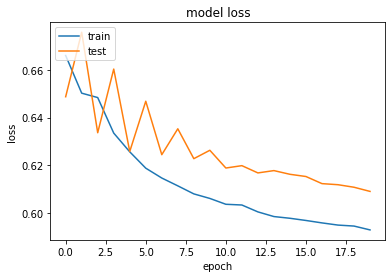

In [42]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
print('Results for Group 1')
print ('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))
print ('Minimum MAE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(abs(min_val_loss)))
results = model.evaluate(x_test, y_test, batch_size=50)
print("test loss, test acc:", results)

plot(history)

In [43]:
pred_grat=g_comb.copy()
for i in range(len(g_comb)):
    for j in range(len(g_comb.T)):
        if((pred_grat.iloc[i,j]==0.0)):
            tem=[[i,j]]
            temp=model.predict(tem)
            #pred_grat.iloc[i,j]=model.predict(tem)
            temp=((temp*(5-1.0))+1.0)
            pred_grat.iloc[i,j]=temp

In [44]:
pred_grat

movie,0,1,2,4,5,6,8,10,12,16,...,2716,2717,2718,2719,2720,2721,2730,2731,2734,2839
user,,,,,,,,,,,,,,,,,,,,,
19,4.000000,5.000000,4.116569,3.462531,4.510828,4.447293,3.827029,3.445346,4.086200,3.854463,...,3.491899,3.894738,4.212666,4.084256,3.841099,4.100538,4.217000,3.602447,3.660425,3.391339
42,3.596273,3.410436,3.835435,3.087367,4.000000,4.229352,3.461879,2.995486,3.745364,3.508138,...,3.140089,3.566331,3.943542,3.809218,3.473428,3.797804,3.932463,3.204023,3.264236,3.008400
66,3.100847,2.880048,3.352046,5.000000,5.000000,3.892580,2.973490,5.000000,3.346604,3.029973,...,2.616987,3.106529,3.488873,3.318588,3.012218,3.341827,3.543630,2.754647,2.829748,2.521135
74,3.220551,3.041348,4.000000,2.671262,5.000000,3.942741,3.072711,3.000000,3.379629,4.000000,...,2.750738,3.195755,3.615133,3.453455,3.107359,3.455805,3.603560,2.823103,2.852697,2.612473
79,4.054427,3.932767,4.228729,3.631515,3.000000,4.534884,3.972331,3.535251,4.185807,3.983903,...,3.644768,4.040582,4.314591,4.205363,3.979328,4.223497,4.317596,3.748314,3.807331,3.553784
116,3.123769,2.982443,3.359861,5.000000,5.000000,4.000000,2.972956,2.562849,3.343319,3.061710,...,5.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.540833,2.762297,2.822417,2.535068
124,3.435198,3.234627,3.000000,2.929153,4.185529,4.119778,3.254045,2.834985,3.587024,3.335754,...,2.893376,3.378773,3.747886,3.610059,3.283986,3.612844,5.000000,2.000000,3.109397,2.803934
129,4.306765,4.203792,4.450589,5.000000,4.706256,4.679954,4.215894,3.916226,4.416188,4.251533,...,3.973949,4.310057,4.510299,4.436395,4.254316,4.425569,4.520223,4.038056,4.000000,3.895843
175,3.140295,2.945334,3.406506,5.000000,3.998435,3.903819,2.997397,2.545895,3.329073,3.036589,...,2.616863,3.100842,3.500067,3.342639,3.050501,3.373782,3.507692,2.732180,2.824010,2.537407


In [45]:
g_comb

movie,0,1,2,4,5,6,8,10,12,16,...,2716,2717,2718,2719,2720,2721,2730,2731,2734,2839
user,,,,,,,,,,,,,,,,,,,,,
19,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,4.0,0.0,5.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,...,5.0,4.0,3.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0
124,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0
129,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
175,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
avg_grat=pred_grat.mean()
avg_grat=avg_grat.sort_values(ascending=False)

In [47]:
#t=5
top7=avg_grat[:t]
re=top7.index.tolist()
print("Top-K recommendations for group G")
top7

Top-K recommendations for group G


movie
1277    4.461937
846     4.449719
2715    4.448231
68      4.363028
231     4.343948
dtype: float32

In [48]:
r=0
p=0
for i in range(len(g_comb)):
    hit=0
    rel=0
    for j in range(len(re)):
        res=g_comb[re[j]]
        if(res.iloc[i]>0):
            hit+=1
    p+=(hit/len(re))
    for j in range(len(g_comb.T)):
        if(g_comb.iloc[i,j]>0):
            rel+=1
    r+=(hit/rel)
p=(p/len(g_comb))
r=(r/len(g_comb))
f1_score=((2*p*r)/(p+r))

print("Precision@5:", p)
print("Recall@5:", r)
print("F1-Score@5:", f1_score)
print("Top-K recommendations for group G")
top7

Precision@5: 0.42000000000000004
Recall@5: 0.018244965625393142
F1-Score@5: 0.03497078649485397
Top-K recommendations for group G


movie
1277    4.461937
846     4.449719
2715    4.448231
68      4.363028
231     4.343948
dtype: float32

In [49]:
sat_g=0
for i in range(len(pred_grat)):
    sat_u=0
    rat=0
    
    for j in range(len(re)):
        res=pred_grat[re[j]]
        rat+=res.iloc[i]
    sat_u=(rat/(t*5))
    sat_g+=sat_u
sat_g=sat_g/len(pred_grat)

In [50]:
sat_g

0.8826745395660399